In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
from funzioni import compute_dataset_weighted
from funzioni import compute_annual_mean_weighted
from funzioni import convert_dataset_celsius
from funzioni import compute_anomaly
from funzioni import compute_mean_zonmean
from funzioni import create_djf_dataset
from funzioni import compute_mean_time_season
from funzioni import compute_mean_resample_mar
#from funzioni import plot_bias_zonmean
from funzioni import plot_bias_tos
from funzioni import plot_mean_cluster_zonmean
from funzioni import plot_mean_cluster_tos
#from funzioni import plot_bias_2_models_zonmean
from funzioni import plot_bias_2_models_tos
from funzioni import plot_std_cluster_zonmean
from funzioni import plot_zonmean
from funzioni import plot_zonmean_2_cluster
from funzioni import plot_mean_cluster_zonmean
from funzioni import plot_std_cluster_tos
from funzioni import plot_std_cluster_zonmean
from funzioni import bs_sample_mean
from funzioni import bs_compute_array_mean_std_95cl
from funzioni import plot_bs_95cl_mean_std
from funzioni import bs_compute_matrix10
from funzioni import plot_bs_mean_cluster_matrix10
from funzioni import plot_bs_diff_cluster
from funzioni import plot_bs_diff_cluster_zonmean
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import plotly.express as px
import dill
import pickle
import cartopy.crs as ccrs
import random

Caricamento file pickle

In [2]:
with open('models_atmos.pkl','rb') as file:
    models_atmos = dill.load(file)
with open('models_zonmean.pkl','rb') as file:
    models_zonmean = dill.load(file)
    era_seas_mean = dill.load(file)
with open('modelli_atmos.pickle', 'rb') as f:
    # Caricamento delle 5 liste contenenti i nomi dei modelli all'interno dei 5 cluster
    list_cluster0 = pickle.load(f)
    list_cluster1 = pickle.load(f)
    list_cluster2 = pickle.load(f)
    list_cluster3 = pickle.load(f)
    list_cluster4 = pickle.load(f)
    
    # Caricamento dei 5 cluster in formato pdf
    atmos_cluster0 = pickle.load(f)
    atmos_cluster1 = pickle.load(f)
    atmos_cluster2 = pickle.load(f)
    atmos_cluster3 = pickle.load(f)
    atmos_cluster4 = pickle.load(f)
    
    # Caricamento dei cluster medi in formato pdf
    atmos_cluster0_mean = pickle.load(f)
    atmos_cluster1_mean = pickle.load(f)
    atmos_cluster2_mean = pickle.load(f)
    atmos_cluster3_mean = pickle.load(f)
    atmos_cluster4_mean = pickle.load(f)

    #Caricamento dei cluster standard deviation in formato pdf
    atmos_cluster0_std = pickle.load(f)
    atmos_cluster1_std = pickle.load(f)
    atmos_cluster2_std = pickle.load(f)
    atmos_cluster3_std = pickle.load(f)
    atmos_cluster4_std = pickle.load(f)
with open('modelli_zonmean.pickle','rb') as f:
    #Caricamento dei 5 cluster in formato pdf
    zonmean_cluster0 = pickle.load(f)
    zonmean_cluster1 = pickle.load(f)
    zonmean_cluster2 = pickle.load(f)
    zonmean_cluster3 = pickle.load(f)
    zonmean_cluster4 = pickle.load(f)
    #Caricamento dei cluster medi in formato pdf
    zonmean_cluster0_mean = pickle.load(f)
    zonmean_cluster1_mean = pickle.load(f)
    zonmean_cluster2_mean = pickle.load(f)
    zonmean_cluster3_mean = pickle.load(f)
    zonmean_cluster4_mean = pickle.load(f)
# Salvataggio in un file Pickle
with open('bootstrap_zonmean.pickle', 'rb') as f: #'rb' = read binary
    array_2th_cluster0_zonmean = pickle.load(f) #cluster0
    array_97th_cluster0_zonmean = pickle.load(f) #cluster0
    array_mean_cluster0_zonmean = pickle.load(f) #cluster0
    array_std_cluster0_zonmean = pickle.load(f) #cluster0
    matrix10_cluster0_zonmean = pickle.load(f) #cluster0
    
    array_2th_cluster1_zonmean = pickle.load(f) #cluster1
    array_97th_cluster1_zonmean = pickle.load(f) #cluster1
    array_mean_cluster1_zonmean = pickle.load(f) #cluster1
    array_std_cluster1_zonmean = pickle.load(f) #cluster1
    matrix10_cluster1_zonmean = pickle.load(f) #cluster1

    array_2th_cluster2_zonmean = pickle.load(f) #cluster2
    array_97th_cluster2_zonmean = pickle.load(f) #cluster2
    array_mean_cluster2_zonmean = pickle.load(f) #cluster2
    array_std_cluster2_zonmean = pickle.load(f) #cluster2
    matrix10_cluster2_zonmean = pickle.load(f) #cluster2

    array_2th_cluster3_zonmean = pickle.load(f) #cluster3
    array_97th_cluster3_zonmean = pickle.load(f) #cluster3
    array_mean_cluster3_zonmean = pickle.load(f) #cluster3
    array_std_cluster3_zonmean = pickle.load(f) #cluster3
    matrix10_cluster3_zonmean = pickle.load(f) #cluster3

    array_2th_cluster4_zonmean = pickle.load(f) #cluster4
    array_97th_cluster4_zonmean = pickle.load(f) #cluster4
    array_mean_cluster4_zonmean = pickle.load(f) #cluster4
    array_std_cluster4_zonmean = pickle.load(f) #cluster4
    matrix10_cluster4_zonmean = pickle.load(f) #cluster4

Mean_bias (cluster originale) - array_mean

Cluster 0

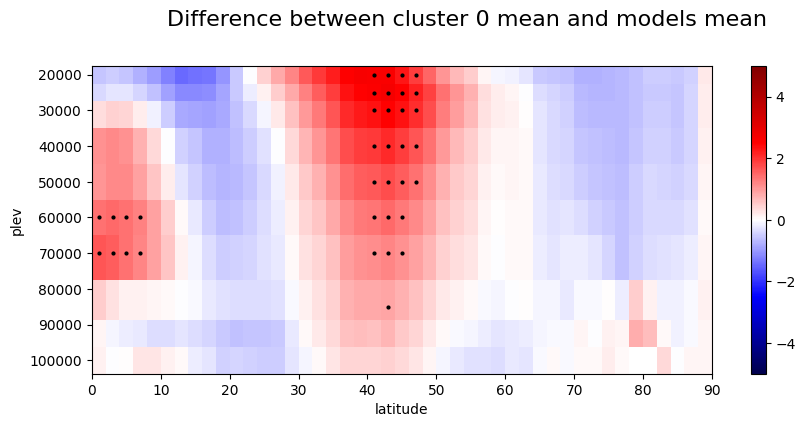

In [3]:
mean_bias_cluster0 = compute_mean_zonmean(list_cluster0,models_zonmean)
diff_cluster0 = mean_bias_cluster0[:,:,0] - array_mean_cluster0_zonmean
plot_bs_diff_cluster_zonmean(diff_cluster0,'Difference between cluster 0 mean and models mean',-5,5,(10,4),matrix10_cluster0_zonmean)

Cluster 1

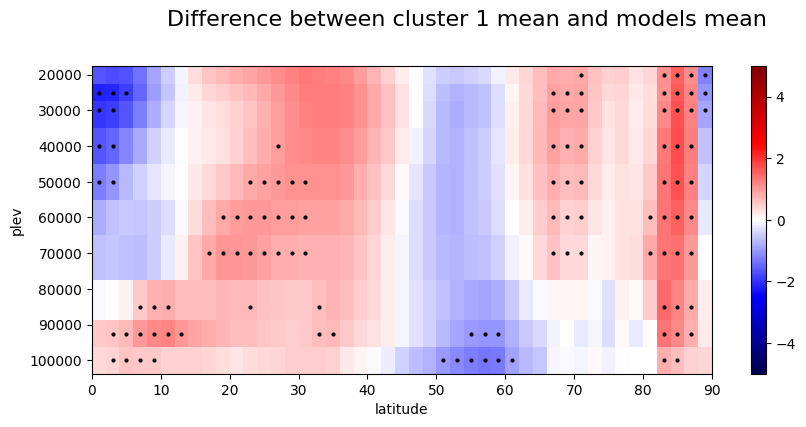

In [4]:
mean_bias_cluster1 = compute_mean_zonmean(list_cluster1,models_zonmean)
diff_cluster1 = mean_bias_cluster1[:,:,0] - array_mean_cluster1_zonmean
plot_bs_diff_cluster_zonmean(diff_cluster1,'Difference between cluster 1 mean and models mean',-5,5,(10,4),matrix10_cluster1_zonmean)

Cluster 2

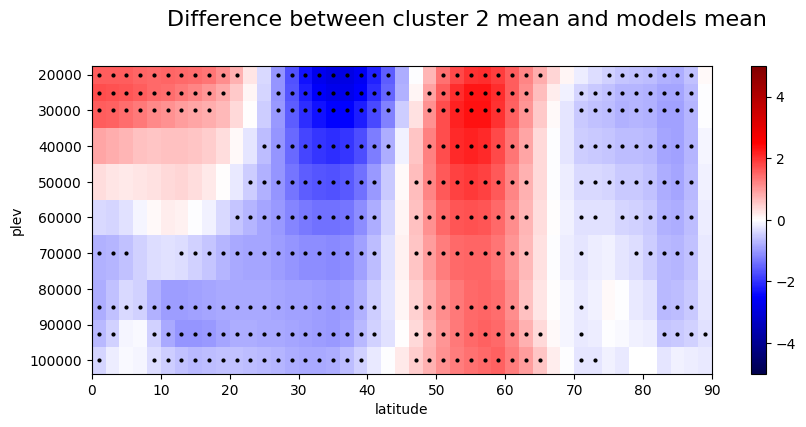

In [5]:
mean_bias_cluster2 = compute_mean_zonmean(list_cluster2,models_zonmean)
diff_cluster2 = mean_bias_cluster2[:,:,0] - array_mean_cluster2_zonmean
plot_bs_diff_cluster_zonmean(diff_cluster2,'Difference between cluster 2 mean and models mean',-5,5,(10,4),matrix10_cluster2_zonmean)

Cluster 3

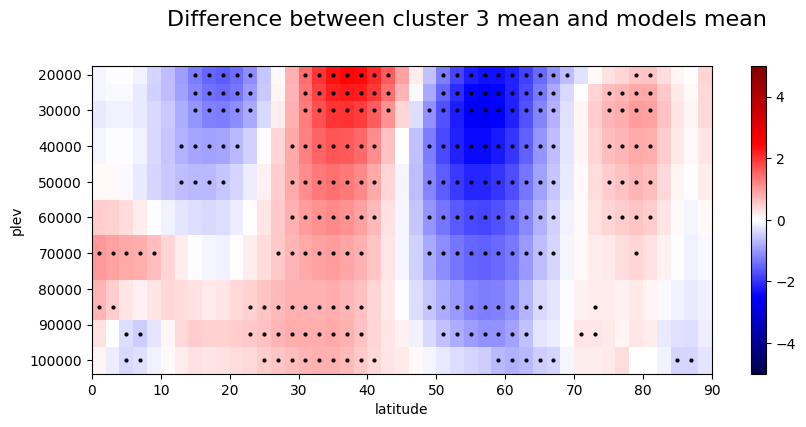

In [6]:
mean_bias_cluster3 = compute_mean_zonmean(list_cluster3,models_zonmean)
diff_cluster3 = mean_bias_cluster3[:,:,0] - array_mean_cluster3_zonmean
plot_bs_diff_cluster_zonmean(diff_cluster3,'Difference between cluster 3 mean and models mean',-5,5,(10,4),matrix10_cluster3_zonmean)

Cluster 4

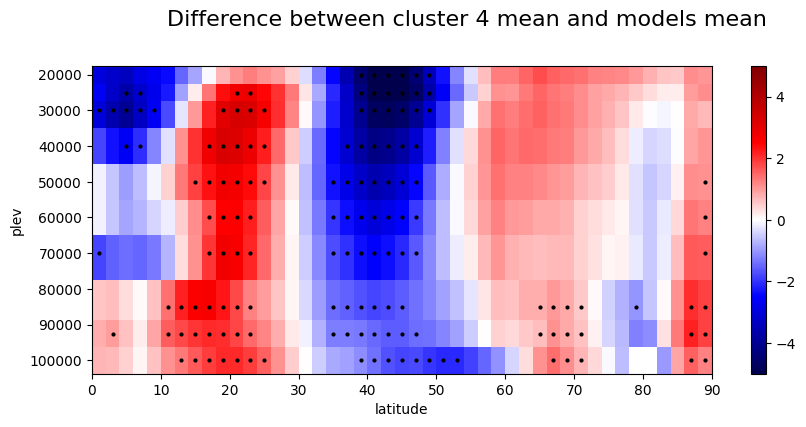

In [7]:
mean_bias_cluster4 = compute_mean_zonmean(list_cluster4,models_zonmean)
diff_cluster4 = mean_bias_cluster4[:,:,0] - array_mean_cluster4_zonmean
plot_bs_diff_cluster_zonmean(diff_cluster4,'Difference between cluster 4 mean and models mean',-5,5,(10,4),matrix10_cluster4_zonmean)